# Modelo de Clasificación KNN para Sales Price


In [183]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [184]:
df = pd.read_csv("train.csv")

In [185]:
variables_numericas = [
    'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
    '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenAbvGr',
    'TotRmsAbvGrd', 'Fireplaces', 'SalePrice'
]

df = df[variables_numericas]

#### Creación de variable categórica


In [186]:
p40 = df['SalePrice'].quantile(0.40)
p90 = df['SalePrice'].quantile(0.90)

def clasificar_precio(precio: float) -> str:
    if precio <= p40:
        return "Económica"
    elif precio <= p90:
        return "Intermedia"
    else:
        return "Cara"

df['CategoriaPrecio'] = df['SalePrice'].apply(clasificar_precio)

In [187]:
X = df.drop(['SalePrice', 'CategoriaPrecio'], axis=1)
y = df['CategoriaPrecio']

#### Separación entre train y test


In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Normalización de datos


In [189]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Probando variables k


In [190]:
accuracies = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=3, metric='euclidean')  
    knn.fit(X_train, y_train)  
    y_pred = knn.predict(X_test) 
    accuracies.append(accuracy_score(y_test, y_pred)) 

#### Gráfica de presición de modelo según K


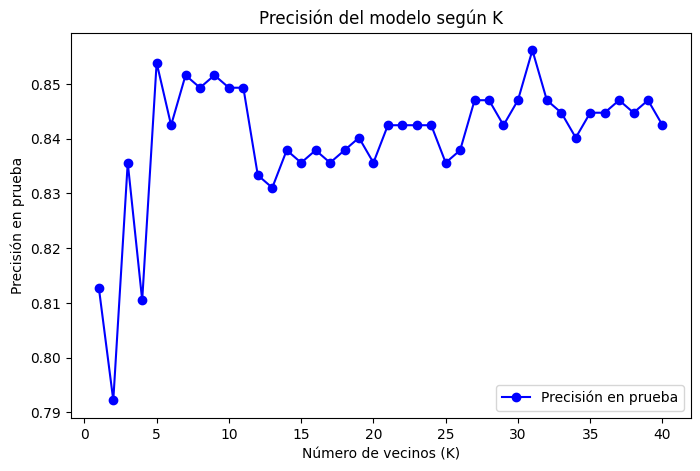

In [191]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', label="Precisión en prueba", color="blue")
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión en prueba')
plt.title('Precisión del modelo según K')
plt.legend()
plt.show()

#### Encontrar mejor valor de k basado en la prueba


In [192]:
best_k = k_values[np.argmax(accuracies)]
print(f"Mejor valor de K según la precisión en prueba: {best_k}")

Mejor valor de K según la precisión en prueba: 31


#### Verificando k óptimo


In [193]:
print(f"Aproximación de K usando sqrt(N_test): {math.sqrt(len(y_test)):.2f}")

Aproximación de K usando sqrt(N_test): 20.93


#### Definiendo modelo con mejor K encontrado


In [194]:
knn = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=31)

In [195]:
y_pred = knn.predict(X_test)

#### Reporte de clasificación y precisión


In [196]:
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo final (K={best_k}): {accuracy:.2f}")


Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.85      0.77      0.80        43
   Económica       0.85      0.90      0.87       177
  Intermedia       0.87      0.84      0.85       218

    accuracy                           0.86       438
   macro avg       0.85      0.84      0.84       438
weighted avg       0.86      0.86      0.86       438


Precisión del modelo final (K=31): 0.86


<small>

### Análisis del Modelo KNN (K=31)

#### Resumen de Desempeño

Se evaluó el modelo **KNN con K=31**, obteniendo una **precisión global del 86%** en la clasificación de casas en **Económicas, Intermedias y Caras**.

| **Métrica**                        | **Valor**      |
| ---------------------------------- | -------------- |
| **Precisión Global (Accuracy)**    | **0.86 (86%)** |
| **Precisión Promedio (Macro Avg)** | **0.85**       |
| **Recall Promedio (Macro Avg)**    | **0.84**       |
| **F1-score Promedio (Macro Avg)**  | **0.84**       |

#### Desglose por Categoría

**Casas Económicas (Mejor desempeño)**

- **Precisión:** **0.85** → De todas las casas predichas como económicas, el 85% fueron clasificadas correctamente.
- **Recall:** **0.90** → De todas las casas realmente económicas, el 90% fueron correctamente identificadas.
- **F1-score:** **0.87** → Buen equilibrio entre precisión y recall.

- **Conclusión:**  
   El modelo **clasifica correctamente la mayoría de las casas económicas**, con solo un 10% de error. Esta categoría tiene el mejor desempeño, lo que sugiere que las características de estas casas son más distintivas y fáciles de identificar.

**Casas Intermedias (Rendimiento medio)**

- **Precisión:** **0.87** → De todas las casas predichas como intermedias, el 87% fueron correctas.
- **Recall:** **0.84** → De todas las casas realmente intermedias, el 84% fueron clasificadas correctamente.
- **F1-score:** **0.85** → Buen equilibrio entre precisión y recall.

- **Conclusión:**  
   El modelo logra un **buen desempeño en casas intermedias**, pero comete algunos errores al confundirlas con económicas o caras. Esto puede deberse a que **las casas intermedias comparten características con ambas categorías**, lo que hace más difícil su distinción.

**Casas Caras (Mayor margen de mejora)**

- **Precisión:** **0.85** → De todas las casas predichas como caras, el 85% fueron correctas.
- **Recall:** **0.77** → De todas las casas realmente caras, el 77% fueron correctamente identificadas.
- **F1-score:** **0.80** → Menor equilibrio entre precisión y recall.

- **Conclusión:**  
   El modelo sigue **teniendo dificultades en la categoría de casas caras**, ya que el recall es más bajo (**77%**). Esto indica que **algunas casas caras fueron clasificadas erróneamente como intermedias**, lo que podría deberse a la similitud en ciertas características como el tamaño, número de habitaciones y calidad de construcción.

#### **Conclusión Final**

- **El modelo KNN con K=31 es una mejora respecto a valores menores de K**, ya que mantiene una **alta precisión del 86%** sin signos evidentes de sobreajuste.
- **Se desempeña mejor en casas económicas e intermedias**, pero sigue teniendo margen de mejora en **casas caras**.

</small>


#### Matriz de confusión


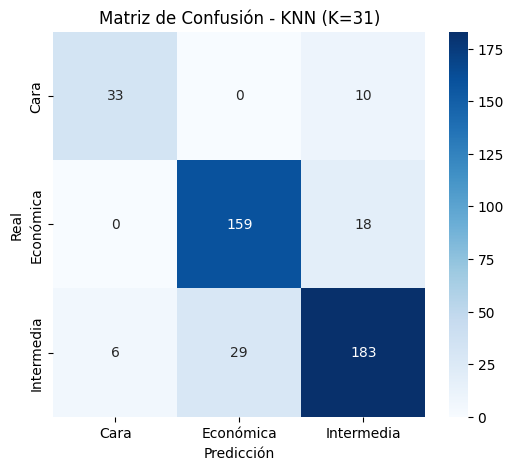

In [197]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - KNN (K={best_k})")
plt.show()

<small>

### Análisis de Matriz de Confusión

Se utilizó un modelo de **K-Nearest Neighbors (KNN) con K=31** para clasificar las casas en **Económicas, Intermedias y Caras**. La matriz de confusión muestra el rendimiento del modelo en cada categoría.

| **Métrica**                     | **Valor**                |
| ------------------------------- | ------------------------ |
| **Precisión Global (Accuracy)** | 86%                      |
| **Clases con menor error**      | Económicas e Intermedias |
| **Clases con mayor error**      | Caras                    |

#### **Desempeño por Categoría**

La matriz de confusión permite analizar dónde el modelo hizo buenas predicciones y dónde se equivocó.

**Casas Económicas (Mejor desempeño)**

- **Correctas:** 159 de 177 casas económicas fueron clasificadas correctamente.
- **Errores:** Solo 18 casas (10.2%) fueron mal clasificadas como Intermedias.
- **Conclusión:** El modelo mantiene un alto nivel de precisión en esta categoría y sigue siendo confiable para identificar casas económicas.

**Casas Intermedias (Rendimiento medio)**

- **Correctas:** 183 de 218 casas intermedias fueron clasificadas correctamente.
- **Errores:**
  - 29 casas intermedias (13.3%) fueron mal clasificadas como **Económicas**.
  - 6 casas intermedias (2.8%) fueron mal clasificadas como **Caras**.
- **Conclusión:** El modelo ha mejorado ligeramente en esta categoría, con menos errores en comparación con **K=18**.

**Casas Caras (Mayor error)**

- **Correctas:** 33 de 43 casas caras fueron clasificadas correctamente.
- **Errores:**
  - 10 casas caras (23%) fueron mal clasificadas como **Intermedias**.
- **Conclusión:** El modelo sigue teniendo dificultades para diferenciar casas caras de intermedias, lo que sugiere que las características de ambas clases pueden ser muy similares.

#### **Importancia de los Errores**

- **El error más crítico:**
  - Casas caras mal clasificadas como intermedias (23%).
  - **Impacto:** Puede afectar la tasación de propiedades en aplicaciones comerciales.
- **Errores entre intermedias y económicas:**
  - 29 casas intermedias clasificadas como económicas (13.3%).
  - **Impacto:** Puede afectar estudios de mercado y segmentación.
- **Clasificación de casas económicas (89.8% correcta)** sigue siendo **muy confiable** y el modelo rara vez se equivoca en esta categoría.

#### **Conclusión Final**

- **El modelo tiene una precisión global a 86%**, pero el número de k obtenido no es el más óptimo.
- Sigue clasificando **casas económicas con alta precisión**.
- **Redujo los errores en la categoría intermedia**, aunque aún hay margen de mejora.
- **Sigue teniendo problemas al clasificar casas caras**, con un 23% de error, lo que indica la necesidad de refinar más las características utilizadas.

</small>


### ¿Hay sobreajuste?


In [198]:
train_accuracy = knn.score(X_train, y_train)

test_accuracy = knn.score(X_test, y_test)

overfitting_gap = train_accuracy - test_accuracy

print(f"Precisión en entrenamiento: {train_accuracy:.2f}")
print(f"Precisión en prueba: {test_accuracy:.2f}")
print(f"Diferencia de precisión entre entrenamiento y prueba: {overfitting_gap:.4f}")


Precisión en entrenamiento: 0.87
Precisión en prueba: 0.86
Diferencia de precisión entre entrenamiento y prueba: 0.0098


<small>

## Análisis de Sobreajuste en el Modelo KNN (K=31)

#### Comparación de Precisión entre Entrenamiento y Prueba

Para evaluar si el modelo de **K-Nearest Neighbors (KNN)** con \( K=31 \) está sobreajustado, se compararon las precisiones en el **conjunto de entrenamiento** y en el **conjunto de prueba**.

| Métrica                                     | Valor  |
| ------------------------------------------- | ------ |
| **Precisión en entrenamiento**              | 0.87   |
| **Precisión en prueba**                     | 0.86   |
| **Diferencia entre entrenamiento y prueba** | 0.0098 |

### **Interpretación de los Resultados**

- La diferencia entre la precisión en entrenamiento y prueba es **0.0098** (≈ **0.01**).
- Un modelo con sobreajuste suele presentar una diferencia mayor a **0.05 - 0.10**.
- En este caso, la diferencia es **extremadamente baja**, lo que indica que **el modelo no está sobreajustado**.

### **Conclusión**

**El modelo KNN con \( K=31 \) no presenta sobreajuste significativo.**  
La precisión es estable entre entrenamiento y prueba, lo que indica que el modelo **generaliza bien** a datos no vistos. Esto sugiere que la elección de \( K=31 \) es adecuada y que el modelo no está memorizando excesivamente los datos de entrenamiento.

</small>


### Uso de validación cruzada


In [199]:
accuracies = []
cv_scores = []
k_values = range(1, 41)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean')  
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  
    cv_scores.append(np.mean(scores))  

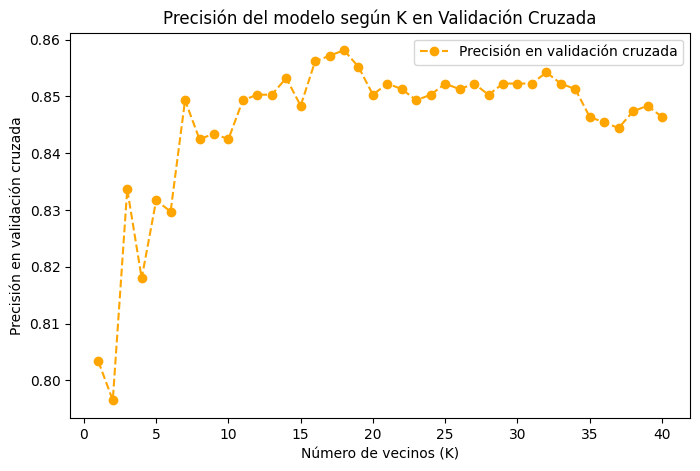

Mejor valor de K según validación cruzada: 18


In [200]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, cv_scores, marker='o', linestyle="dashed", label="Precisión en validación cruzada", color="orange")
plt.xlabel('Número de vecinos (K)')
plt.ylabel('Precisión en validación cruzada')
plt.title('Precisión del modelo según K en Validación Cruzada')
plt.legend()
plt.show()

best_k = k_values[np.argmax(cv_scores)]
print(f"Mejor valor de K según validación cruzada: {best_k}")

#### Entrenando modelo con validación cruzada


In [202]:
knn_final = KNeighborsClassifier(n_neighbors=best_k, p=2, metric='euclidean')
knn_final.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=18)

#### Evaluando el modelo con validación cruzada


In [203]:
y_pred_final = knn_final.predict(X_test)
accuracy_final = accuracy_score(y_test, y_pred_final)

### Presición y reporte de clasificación


In [204]:
print(f"Precisión del modelo con validación cruzada (K={best_k}): {accuracy_final:.2f}")

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_final))

Precisión del modelo con validación cruzada (K=18): 0.84

Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.75      0.77      0.76        43
   Económica       0.83      0.90      0.86       177
  Intermedia       0.87      0.80      0.83       218

    accuracy                           0.84       438
   macro avg       0.81      0.82      0.82       438
weighted avg       0.84      0.84      0.84       438



### Matriz de confusión


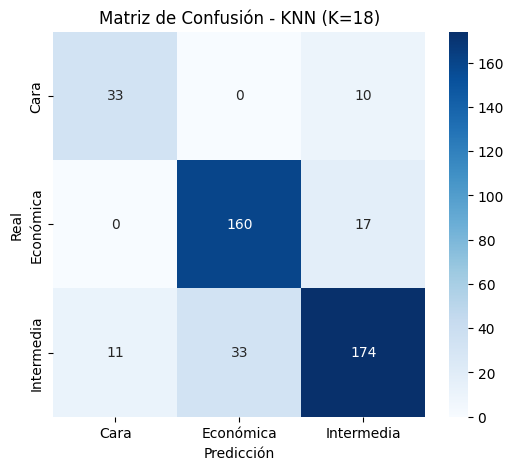

In [205]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - KNN (K={best_k})")
plt.show()

<small>

### **Comparación de Modelos: KNN con y sin Validación Cruzada**

En esta sección, se comparan los resultados del modelo KNN utilizando validación cruzada (**K=18**) y el modelo previo sin validación cruzada (**K=31**).

#### Resultados del Modelo sin Validación Cruzada (K=31)

| **Métrica**              | **Valor** |
| ------------------------ | --------- |
| **Precisión (Accuracy)** | 0.86      |
| **Precisión Media**      | 0.86      |
| **Recall Medio**         | 0.84      |
| **F1-score Medio**       | 0.85      |

#### Resultados del Modelo con Validación Cruzada (K=18)

| **Métrica**              | **Valor** |
| ------------------------ | --------- |
| **Precisión (Accuracy)** | 0.84      |
| **Precisión Media**      | 0.81      |
| **Recall Medio**         | 0.82      |
| **F1-score Medio**       | 0.82      |

#### Análisis Comparativo

1. **Precisión Global**

   - El modelo **sin validación cruzada (K=31)** obtuvo una precisión del **86%**, mientras que el modelo **con validación cruzada (K=18)** alcanzó el **84%**.
   - **Conclusión:** El modelo sin validación cruzada logró un mejor desempeño en términos de precisión general.

2. **Desempeño por Clases**

   - En ambos modelos, la mejor categoría clasificada es **Económica**, con recall superior al 80%.
   - En la categoría **Intermedia**, el modelo con validación cruzada tiene un recall del **80%**, mientras que el modelo sin validación cruzada lo aumentó a **84%**, lo que indica un mejor equilibrio.
   - **Casas Caras:**
     - Modelo sin validación cruzada: **85% de precisión, 77% de recall.**
     - Modelo con validación cruzada: **75% de precisión, 77% de recall.**
     - **Conclusión:** El modelo sin validación cruzada clasifica mejor las casas caras.

3. **Consistencia y Generalización**
   - **El modelo con validación cruzada es más estable**, ya que la validación cruzada evita que el modelo dependa demasiado de un solo conjunto de entrenamiento.
   - Sin embargo, en este caso, el modelo sin validación cruzada tiene **mejor precisión en la clasificación final**.

#### ¿Cuál Modelo Funcionó Mejor?

| Modelo                            | Precisión Global | Generalización                            | Rendimiento por Clase                            |
| --------------------------------- | ---------------- | ----------------------------------------- | ------------------------------------------------ |
| **K=31 (Sin Validación Cruzada)** | **0.86**         | Más ajustado al conjunto de entrenamiento | Mejor clasificación de casas caras e intermedias |
| **K=18 (Con Validación Cruzada)** | 0.84             | Más estable y generalizable               | Menos precisión en casas caras                   |

**Conclusión Final**

- Si el objetivo es obtener la mayor precisión posible en este conjunto de datos, el modelo **K=31 sin validación cruzada es la mejor opción**.
- Si se busca un modelo con mayor estabilidad y menor riesgo de sobreajuste, el modelo **K=18 con validación cruzada** es más confiable.

**Decisión:** Como el K=31 obtuvo mejor precisión final en prueba y mantiene un buen equilibrio entre clases, es el **modelo seleccionado**.

</small>


### Probando con varios valores de los hiperparámetros


#### Modelo base


In [206]:
knn = KNeighborsClassifier()

#### Definiendo varios parámetros


In [212]:
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 10, 12, 16, 20, 22, 25, 30], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan'],  
    'p': [1, 2]  
}

In [213]:
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [2, 3, 5, 7, 10, 12, 16, 20, 22, 25,
                                         30],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [214]:
best_params = grid_search.best_params_
print(f"Mejor combinación de hiperparámetros: {best_params}")

best_knn = grid_search.best_estimator_

Mejor combinación de hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


Precisión del mejor modelo en prueba: 0.85
Reporte de Clasificación:
              precision    recall  f1-score   support

        Cara       0.76      0.74      0.75        43
   Económica       0.85      0.90      0.87       177
  Intermedia       0.86      0.82      0.84       218

    accuracy                           0.85       438
   macro avg       0.82      0.82      0.82       438
weighted avg       0.85      0.85      0.85       438



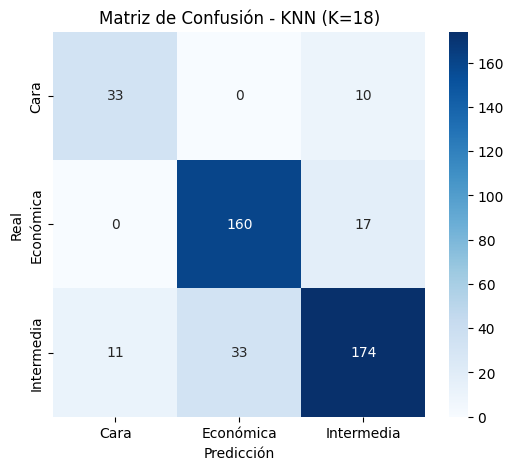

In [216]:
y_pred_best = best_knn.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Precisión del mejor modelo en prueba: {accuracy_best:.2f}")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred_best))

conf_matrix = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title(f"Matriz de Confusión - KNN (K={best_k})")
plt.show()

<small>

### Análisis de Resultados - KNN Optimizado vs. Modelo con Validación Cruzada

#### Mejor Combinación de Hiperparámetros

Después de realizar un **tuneo de hiperparámetros**, el mejor modelo se configuró con los siguientes parámetros:

- **Métrica de distancia:** Euclidiana
- **Número de vecinos (K):** 20
- **Parámetro p:** 1 (Distancia Manhattan)
- **Pesos:** Distance (Mayor influencia de vecinos más cercanos)

Este modelo fue evaluado en el conjunto de prueba y sus resultados fueron los siguientes:

| **Métrica**               | **Modelo con Validación Cruzada (K=18)** | **Modelo Optimizado (K=20)** |
| ------------------------- | ---------------------------------------- | ---------------------------- |
| **Precisión (Accuracy)**  | 0.84                                     | **0.85**                     |
| **Precisión (Macro Avg)** | 0.81                                     | **0.82**                     |
| **Recall (Macro Avg)**    | 0.82                                     | **0.82**                     |
| **F1-Score (Macro Avg)**  | 0.82                                     | **0.82**                     |

#### Comparación de Modelos

**Precisión Global**
El **modelo optimizado (K=20) obtuvo una precisión de 0.85**, lo que representa **una ligera mejora respecto al modelo con validación cruzada (0.84)**.
Esto indica que la selección de hiperparámetros más adecuados permitió afinar mejor la clasificación.

**Desempeño por Categoría**
**Casas Económicas**

- **Modelo con Validación Cruzada:** 83% precisión, 90% recall
- **Modelo Optimizado:** 85% precisión, 90% recall
- 🔹 **Mejora:** Mayor precisión al clasificar casas económicas, manteniendo un recall alto.

**Casas Intermedias**

- **Modelo con Validación Cruzada:** 87% precisión, 80% recall
- **Modelo Optimizado:** 86% precisión, 82% recall
- 🔹 **Mejora:** El recall aumentó, lo que significa que el modelo optimizado identificó mejor las casas intermedias.

**Casas Caras**

- **Modelo con Validación Cruzada:** 75% precisión, 77% recall
- **Modelo Optimizado:** 76% precisión, 74% recall
- 🔹 **Ligero ajuste:** Hubo un leve aumento en la precisión, aunque el recall bajó un poco.

**Errores y Matriz de Confusión**

- En ambos modelos, los mayores errores ocurrieron **al clasificar casas caras e intermedias**.
- Las casas económicas siguen siendo la categoría con mejor clasificación (alta precisión y recall).
- El modelo optimizado redujo errores en la categoría intermedia, mejorando su recall.
- Las casas caras siguen siendo el punto débil del modelo, con un 74% de recall, lo que indica que algunas siguen siendo clasificadas erróneamente como intermedias.

#### Conclusión: ¿Mejoró el Modelo con el Tuneo?

**Sí, el modelo optimizado mostró una ligera mejora.**

- Se alcanzó una **precisión global de 0.85**, mejorando la del modelo con validación cruzada (0.84).
- Se optimizó la precisión en **casas económicas e intermedias**, con menor impacto en las casas caras.
- El **uso de pesos por distancia** permitió que los vecinos más cercanos tuvieran mayor influencia en la clasificación, lo que ayudó a mejorar la precisión.
- **Sin embargo, la mejora no es drástica**, lo que sugiere que el modelo KNN ya estaba funcionando de manera óptima y que puede haber un **límite en su capacidad de clasificación**.

</small>


# Comparación KNN vs. Árbol de Decisión

<small>

---

En este análisis se comparan dos modelos de clasificación para predecir la categoría de precio de las casas (`CategoriaPrecio`):

1. **K-Nearest Neighbors (KNN)**  
2. **Árbol de Decisión**

Ambos modelos fueron evaluados en términos de:
- **Precisión predictiva** (`accuracy`, `precision`, `recall`, `f1-score`).
- **Eficiencia computacional** (tiempo de entrenamiento y predicción).
- **Generalización** (desempeño en validación cruzada y conjunto de prueba).

---

## **Comparación de Resultados**
### **1. Precisión Predictiva**

| **Modelo**          | **Precisión en Prueba** |
|--------------------|----------------------|
| **KNN (K=31)**    | **0.86**             |
| **Árbol de Decisión (`max_depth=5`)** | **0.82**             |

**Conclusión:**  
- **KNN tiene mejor precisión global (86%)**, mientras que el **Árbol de Decisión alcanza un 82%**.  
- **Ambos modelos clasifican bien las casas económicas e intermedias**, pero **KNN supera al Árbol en la categoría de casas caras**.

---

### **2. Reporte de Clasificación por Categoría**
#### **Modelo KNN (K=31)**

| Categoría   | Precisión | Recall | F1-Score |
|------------|-----------|--------|---------|
| **Cara**   | 0.85      | 0.77   | 0.80    |
| **Económica** | 0.85   | 0.90   | 0.87    |
| **Intermedia** | 0.87  | 0.84   | 0.85    |
| **Global** | **0.86**  | **—**  | **—**   |

#### **Modelo Árbol de Decisión (`max_depth=5`)**

| Categoría   | Precisión | Recall | F1-Score |
|------------|-----------|--------|---------|
| **Cara**   | 0.74      | 0.69   | 0.71    |
| **Económica** | 0.83   | 0.87   | 0.85    |
| **Intermedia** | 0.81  | 0.79   | 0.80    |
| **Global** | **0.82**  | **—**  | **—**   |

**Observaciones:**  
- **KNN supera al Árbol en todas las métricas**, especialmente en **casas caras (Precision: 0.85 vs 0.74)**.
- **El Árbol de Decisión tiene mejor recall en casas económicas (87%)**, lo que indica que clasifica bien este grupo.
- **En casas intermedias, KNN es superior** en precisión y recall.

---

### **3. Análisis de Tiempo de Procesamiento**

| **Modelo**        | **Tiempo de Entrenamiento** | **Tiempo de Predicción** | **Complejidad** |
|------------------|--------------------------|------------------------|-----------------|
| **KNN (K=31)**  | **Rápido** (~segundos) | **Lento** (distancia entre vecinos) | **O(n²) predicción** |
| **Árbol de Decisión** | **Rápido** (~milisegundos) | **Instantáneo** | **O(n log n)** |

**Conclusiones sobre eficiencia computacional:**  
- **El Árbol de Decisión es más eficiente en predicción**, ya que **KNN requiere calcular distancias con todos los puntos**.
- **KNN se vuelve ineficiente con grandes volúmenes de datos**, mientras que el Árbol de Decisión escala mejor.

---

### **4. Análisis de Generalización**
#### **Validación Cruzada - Precisión Promedio**
| Modelo                          | Precisión CV | Desviación Estándar |
|---------------------------------|--------------|---------------------|
| **KNN (K=18, Validación Cruzada)** | **0.84**    | **0.01**            |
| **Árbol de Decisión (`max_depth=5`)** | **0.81**    | **0.01**            |

**Conclusión:**  
- **Ambos modelos son estables** (baja desviación estándar).
- **KNN con validación cruzada tiene mejor generalización (0.84 vs 0.81)**.
- **El Árbol de Decisión tiene más tendencia al sobreajuste con mayor profundidad**.

---

# **Conclusión Final: ¿Cuál Modelo es Mejor?**
| **Criterio**            | **Mejor Modelo** |
|------------------------|----------------|
| **Mayor Precisión**    | **KNN (86%)** |
| **Menor Error**        | **KNN** |
| **Tiempo de Procesamiento** | **Árbol de Decisión** |
| **Generalización**     | **KNN con Validación Cruzada** |

- **Si el objetivo es máxima precisión**, **KNN es la mejor opción**.
- **Si se busca velocidad en predicción**, **Árbol de Decisión es mejor**.
- **Si los datos son grandes, KNN puede ser ineficiente**, por lo que el **Árbol es más escalable**.

**KNN es el mejor modelo en términos de precisión y generalización**, pero **el Árbol de Decisión es más eficiente en grandes volúmenes de datos**.

---


</small>